## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load trainig data for folding

In [2]:
train_sequences = pd.read_csv("/kaggle/input/stanford-rna-3d-folding/train_sequences.csv")
train_labels = pd.read_csv("/kaggle/input/stanford-rna-3d-folding/train_labels.csv")
train_sequences.shape, train_labels.shape

((844, 5), (137095, 6))

In [3]:
train_sequences.columns, train_labels.columns

(Index(['target_id', 'sequence', 'temporal_cutoff', 'description',
        'all_sequences'],
       dtype='object'),
 Index(['ID', 'resname', 'resid', 'x_1', 'y_1', 'z_1'], dtype='object'))

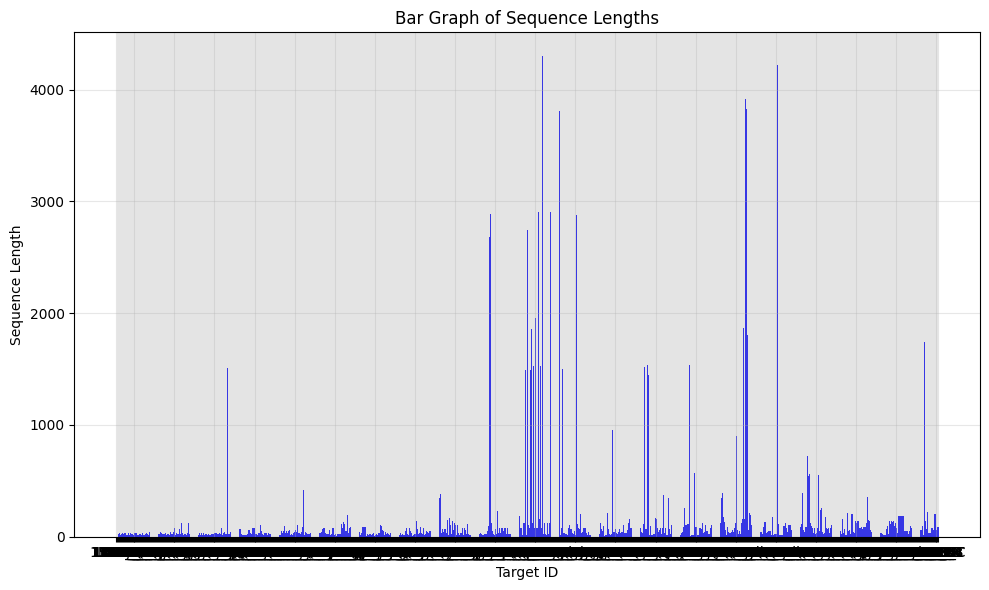

In [4]:
df = train_sequences
# Calculate the sequence length for each row
df['sequence_length'] = df['sequence'].apply(len)

# Create a bar plot of sequence lengths
plt.figure(figsize=(10, 6))
plt.bar(df['target_id'], df['sequence_length'], color='blue')
plt.xlabel('Target ID')
plt.ylabel('Sequence Length')
plt.title('Bar Graph of Sequence Lengths')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame loaded as 'df'
# and have calculated sequence lengths as shown in the previous code

# Calculate sequence lengths if not already done
df['sequence_length'] = df['sequence'].apply(len)

# Calculate statistics
mean_length = df['sequence_length'].mean()
median_length = df['sequence_length'].median()

# Print the statistics
print(f"Average (Mean) Sequence Length: {mean_length:.2f}")
print(f"Median Sequence Length: {median_length:.2f}")

# You can also get a more comprehensive summary with describe()
print("\nSummary Statistics:")
print(df['sequence_length'].describe())

Average (Mean) Sequence Length: 162.43
Median Sequence Length: 39.50

Summary Statistics:
count     844.000000
mean      162.434834
std       515.031957
min         3.000000
25%        22.000000
50%        39.500000
75%        86.000000
max      4298.000000
Name: sequence_length, dtype: float64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have your DataFrame loaded as 'df'
# First, calculate the sequence length for each RNA
df['sequence_length'] = df['sequence'].apply(len)

# Create a new column 'fold' and initialize all values to 0
df['fold'] = 0

# Identify validation samples (sequences between 80 and 400 nucleotides)
validation_mask = (df['sequence_length'] >= 80) & (df['sequence_length'] <= 400)
validation_set = df[validation_mask]

# Set 'fold' value to 1 for validation samples
df.loc[validation_mask, 'fold'] = 1

# Print information about the validation set
print(f"Total sequences in original dataset: {len(df)}")
print(f"Sequences selected for validation: {len(validation_set)}")
print(f"Percentage of data used for validation: {len(validation_set)/len(df)*100:.2f}%")

# Save the entire dataset with the new 'fold' column
df.to_csv('rna_dataset_with_fold.csv', index=False)

# You can also verify the fold assignment
print("\nFold distribution:")
print(df['fold'].value_counts())


Total sequences in original dataset: 844
Sequences selected for validation: 178
Percentage of data used for validation: 21.09%

Fold distribution:
fold
0    666
1    178
Name: count, dtype: int64


In [7]:
df[df["fold"]==0].shape, df[df["fold"]==1].shape

((666, 7), (178, 7))